In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
test_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,1,Puppy,2,307,0,1,1,0,0,2,...,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0
1,2,London,24,266,0,1,2,7,0,2,...,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0


Test data does not contain target variable of speed of adoption

In [35]:
# Create helper method to visualise data
def visualise_count_plot(df, x_axis_column, title=None, split_by=None, show_percentage=False):
    # Plot title
    if title is not None:
        plt.title(title)
    
    # Size of rows in dataframe
    total = len(df)
    ax = sns.countplot(data=df, x=x_axis_column, hue=split_by)
    if show_percentage is True:   
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.show()


def visualise_histogram_plot(df, x_axis_column, title=None, kde=False):
    if title is not None:
        plt.title(title)
    sns.distplot(df[x_axis_column], kde=kde)


In [5]:
# Rename values for easier visualisation
train_df['Gender'] = train_df['Gender'].map({1: 'Male', 2: 'Female', 3: 'Mixed'})
train_df['Type'] = train_df['Type'].map({1: 'Dog', 2: 'Cat'})


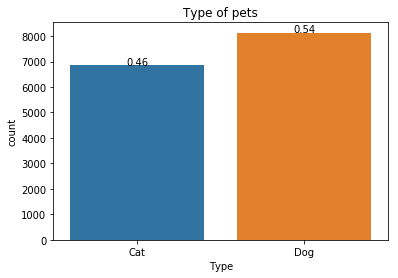

In [32]:
# Number of cats and dogs
visualise_count_plot(train_df, 'Type', 'Type of pets')

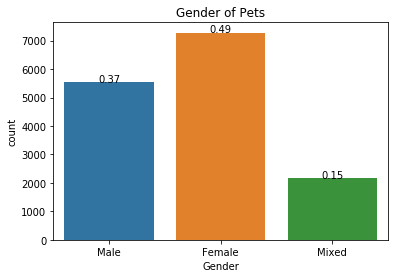

In [30]:
# Display Gender
visualise_count_plot(train_df, 'Gender', 'Gender of Pets')

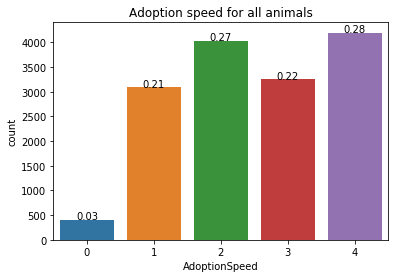

In [27]:
# Adoption rate for all animals
visualise_count_plot(train_df, 'AdoptionSpeed', title='Adoption speed for all animals')

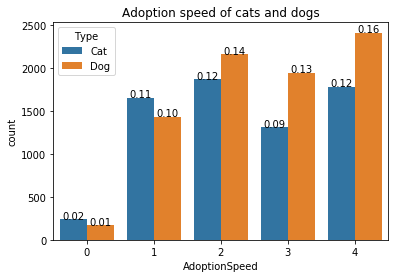

In [28]:
# Display adoption speed of cats dogs
visualise_count_plot(train_df, 'AdoptionSpeed', split_by='Type', title='Adoption speed of cats and dogs')

In [29]:
Cats are more likely to be adopted than dogs

SyntaxError: invalid syntax (<ipython-input-29-fdc31c53f9ae>, line 1)

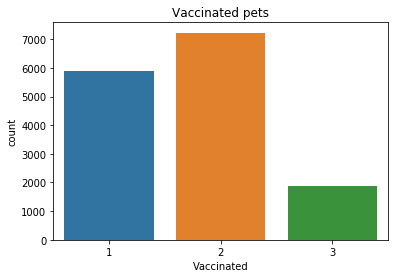

In [13]:
# Display vaccinated
visualise_count_plot(train_df, 'Vaccinated', 'Vaccinated pets')

/home/wongy/anaconda2/envs/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


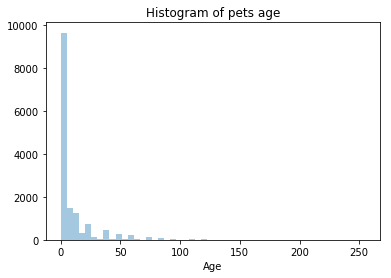

In [14]:
# Display distribution of age of pets
visualise_histogram_plot(train_df, 'Age', title='Histogram of pets age')

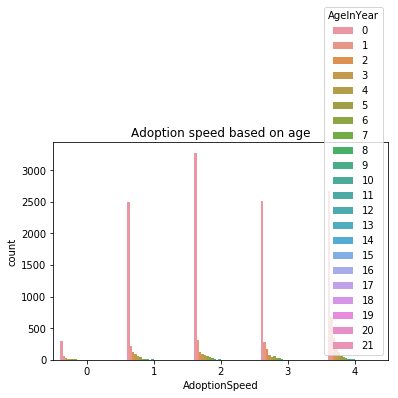

In [18]:
# Display adoption speed by age

# Bin months into years
years = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
train_df['AgeInYear'] = pd.cut(train_df['Age'], 22,
                                   labels=years)

visualise_count_plot(train_df, 'AdoptionSpeed', split_by='AgeInYear', title='Adoption speed based on age')

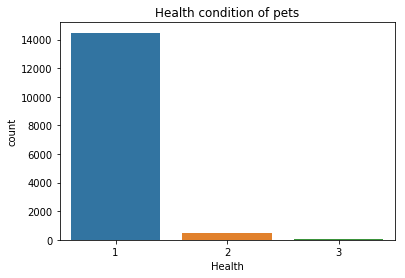

In [19]:
# Health condition of pets
#Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
visualise_count_plot(train_df, 'Health', title='Health condition of pets')

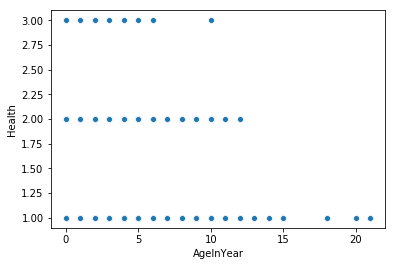

In [20]:
# Health of pets based on their age
sns.scatterplot(data=train_df, x='AgeInYear', y='Health')

# Gender

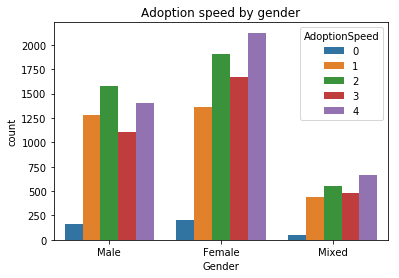

In [36]:
visualise_count_plot(train_df, 'Gender', split_by='AdoptionSpeed', title='Adoption speed by gender')

# Colors

In [39]:
color_lables_df = pd.read_csv('data/color_labels.csv')
keys = color_lables_df.ColorID
values = color_lables_df.ColorName

color_map = dict(zip(keys,values))
print(color_map)
print(train_df.Color1.unique())

{1: 'Black', 2: 'Brown', 3: 'Golden', 4: 'Yellow', 5: 'Cream', 6: 'Gray', 7: 'White'}
[1 2 5 6 3 7 4]
